In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import os
#os.chdir("C:/Users/admin/Python_Prac/Ads_Report.csv")

In [3]:
pwd

'C:\\Users\\admin\\Python_Prac'

In [15]:
# Importing the dataset
dataset = pd.read_csv('Ads_Report.csv')
print(dataset.head())
X =dataset.iloc[:, [2, 3]]
y =dataset.iloc[:, 4]

    User ID  Gender  Age  EstimatedEarning  Purchased
0  15624510    Male   19             19000          0
1  15810944    Male   35             20000          0
2  15668575  Female   26             43000          0
3  15603246  Female   27             57000          0
4  15804002    Male   19             76000          0


In [16]:
type(X)
print(X.head())

   Age  EstimatedEarning
0   19             19000
1   35             20000
2   26             43000
3   27             57000
4   19             76000


In [17]:
dataset.shape

(400, 5)

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [19]:
print(X_train.shape)
print(y_train.shape)

(300, 2)
(300,)


In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [21]:
# apply logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty='l2',C=0.5,class_weight='balanced')
LR.fit(X_train, y_train)
print(LR.coef_)
print(LR.intercept_)

[[2.05117884 1.11453493]]
[-0.42085143]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


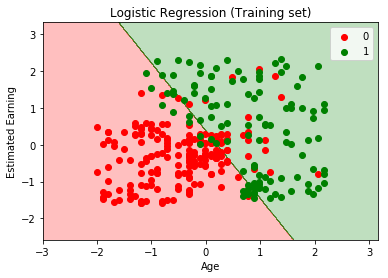

In [22]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X_train[:, 0].min() - 1, stop = X_train[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_train[:, 1].min() - 1, stop = X_train[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, LR.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Earning')
plt.legend()
plt.show()

In [56]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
SVM = SVC(kernel = 'rbf', degree = 5, random_state = 0,C=5)
SVM.fit(X_train, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [25]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear', degree = 5, random_state = 0,C=100)
SVM.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [46]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
SVM = SVC(kernel = 'poly', degree = 2, random_state = 0,C=100)
SVM.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [57]:
SVM.support_vectors_

array([[ 0.58164944, -0.88670699],
       [ 1.07681071, -0.13288524],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [-0.01254409,  1.22979253],
       [ 0.38358493, -0.48080297],
       [ 0.77971394,  0.76590222],
       [ 0.38358493,  0.30201192],
       [-0.50770535,  1.25878567],
       [ 0.28455268,  0.30201192],
       [ 0.18552042,  0.24402563],
       [ 0.77971394, -0.30684411],
       [ 2.06713324, -0.79972756],
       [ 0.77971394,  0.12805305],
       [ 0.97777845,  2.07059371],
       [-0.30964085,  0.53395707],
       [ 1.17584296, -0.74174127],
       [-0.01254409,  0.30201192],
       [ 0.38358493,  0.1570462 ],
       [ 0.8787462 , -0.65476184],
       [-0.11157634,  0.30201192],
       [ 1.27487521,  1.8676417 ],
       [ 0.68068169,  0.27301877],
       [ 0.18552042,  0.1570462 ],
       [ 0.48261718,  1.83864855],
       [ 0.77971394, -1.37959044],
       [-1.89415691, -1.46656987],
       [ 1.07681071,  0.12805305],
       [ 1.37390747,

In [58]:
# predict on test
y_pred = SVM.predict(X_test)

In [59]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


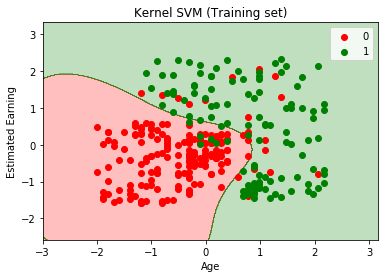

In [60]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X_train[:, 0].min() - 1, stop = X_train[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_train[:, 1].min() - 1, stop = X_train[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, SVM.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Earning')
plt.legend()
plt.show()

In [26]:
print(X_set[:, 0].min() - 1)
print(X_set[:, 0].max() + 1)

-2.99318915946
3.16616549592


In [30]:
(2.99+3.16)/0.01

615.0

In [12]:
print(X_set[:, 1].min() - 1)
print(X_set[:, 1].max() + 1)

-2.5825424477554764
3.3315320031817324


In [33]:
(2.58+3.33)/0.01

591.0

In [31]:
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)

array([ -2.58254245e+00,  -2.57254245e+00,  -2.56254245e+00,
        -2.55254245e+00,  -2.54254245e+00,  -2.53254245e+00,
        -2.52254245e+00,  -2.51254245e+00,  -2.50254245e+00,
        -2.49254245e+00,  -2.48254245e+00,  -2.47254245e+00,
        -2.46254245e+00,  -2.45254245e+00,  -2.44254245e+00,
        -2.43254245e+00,  -2.42254245e+00,  -2.41254245e+00,
        -2.40254245e+00,  -2.39254245e+00,  -2.38254245e+00,
        -2.37254245e+00,  -2.36254245e+00,  -2.35254245e+00,
        -2.34254245e+00,  -2.33254245e+00,  -2.32254245e+00,
        -2.31254245e+00,  -2.30254245e+00,  -2.29254245e+00,
        -2.28254245e+00,  -2.27254245e+00,  -2.26254245e+00,
        -2.25254245e+00,  -2.24254245e+00,  -2.23254245e+00,
        -2.22254245e+00,  -2.21254245e+00,  -2.20254245e+00,
        -2.19254245e+00,  -2.18254245e+00,  -2.17254245e+00,
        -2.16254245e+00,  -2.15254245e+00,  -2.14254245e+00,
        -2.13254245e+00,  -2.12254245e+00,  -2.11254245e+00,
        -2.10254245e+00,

In [16]:
d1, d2 = np.meshgrid(np.arange(-5, 5, step = 1),
                     np.arange(-4, 4, step = 1))
print(d1)
print(d2)

[[-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]]
[[-4 -4 -4 -4 -4 -4 -4 -4 -4 -4]
 [-3 -3 -3 -3 -3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3]]


In [63]:
np.array([d1.ravel(), d2.ravel()]).T

array([[-5, -4],
       [-4, -4],
       [-3, -4],
       [-2, -4],
       [-1, -4],
       [ 0, -4],
       [ 1, -4],
       [ 2, -4],
       [ 3, -4],
       [ 4, -4],
       [-5, -3],
       [-4, -3],
       [-3, -3],
       [-2, -3],
       [-1, -3],
       [ 0, -3],
       [ 1, -3],
       [ 2, -3],
       [ 3, -3],
       [ 4, -3],
       [-5, -2],
       [-4, -2],
       [-3, -2],
       [-2, -2],
       [-1, -2],
       [ 0, -2],
       [ 1, -2],
       [ 2, -2],
       [ 3, -2],
       [ 4, -2],
       [-5, -1],
       [-4, -1],
       [-3, -1],
       [-2, -1],
       [-1, -1],
       [ 0, -1],
       [ 1, -1],
       [ 2, -1],
       [ 3, -1],
       [ 4, -1],
       [-5,  0],
       [-4,  0],
       [-3,  0],
       [-2,  0],
       [-1,  0],
       [ 0,  0],
       [ 1,  0],
       [ 2,  0],
       [ 3,  0],
       [ 4,  0],
       [-5,  1],
       [-4,  1],
       [-3,  1],
       [-2,  1],
       [-1,  1],
       [ 0,  1],
       [ 1,  1],
       [ 2,  1],
       [ 3,  1

In [64]:
classifier.predict(np.array([d1.ravel(), d2.ravel()]).T).reshape(d1.shape)

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]], dtype=int64)

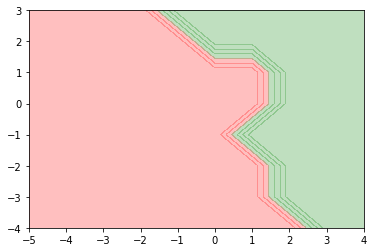

In [65]:
plt.contourf(d1, d2, classifier.predict(np.array([d1.ravel(), d2.ravel()]).T).reshape(d1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(d1.min(), d1.max())
plt.ylim(d2.min(), d2.max())
plt.show()

In [18]:
for i, j in enumerate(np.unique(y_set)):
    print(i,j)

0 0
1 1


In [31]:
for i in enumerate(np.unique(y_set)):
    print(i)

(0, 0)
(1, 1)


In [30]:
c = ListedColormap(('red', 'green'))
print(c(0))
print(c(1))

(1.0, 0.0, 0.0, 1.0)
(0.0, 0.5019607843137255, 0.0, 1.0)


In [62]:
%%time
# build grid search parameters
parms = {'C': [0.5,1,2], 
         'kernel': ["linear","poly","rbf","sigmoid"]}
#build svm object
# perform grid search
from sklearn.svm import SVC
SVM = SVC(class_weight='balanced')
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(estimator = SVM,param_grid = parms, scoring = 'roc_auc',cv=3,refit=True,
                           return_train_score = True,verbose=10,n_jobs=1)
CV.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.5, kernel=linear ............................................
[CV] .... C=0.5, kernel=linear, score=0.873015873015873, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.8794508794508795, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.9635349635349636, total=   0.0s
[CV] C=0.5, kernel=poly ..............................................
[CV] ....... C=0.5, kernel=poly, score=0.89017589017589, total=   0.0s
[CV] C=0.5, kernel=poly ..............................................
[CV] ..... C=0.5, kernel=poly, score=0.9090519090519091, total=   0.0s
[CV] C=0.5, kernel=poly ..............................................
[CV] ..... C=0.5, kernel=poly, score=0.9643929643929644, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", 


[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.8743028743028743, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.8773058773058773, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.9635349635349635, total=   0.0s
[CV] C=1, kernel=poly ................................................
[CV] ....... C=1, kernel=poly, score=0.8897468897468898, total=   0.0s
[CV] C=1, kernel=poly ................................................
[CV] ....... C=1, kernel=poly, score=0.8966108966108967, total=   0.0s
[CV] C=1, kernel=poly ................................................
[CV] ....... C=1, kernel=poly, score=0.9661089661089661, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ........ C=1, kernel=rbf, score=0.9146289146289147, total=   0.0s
[CV] 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[CV] .... C=1, kernel=sigmoid, score=0.8305448305448306, total=   0.0s
[CV] C=2, kernel=linear ..............................................
[CV] ..... C=2, kernel=linear, score=0.8743028743028743, total=   0.0s
[CV] C=2, kernel=linear ..............................................
[CV] ..... C=2, kernel=linear, score=0.8811668811668812, total=   0.0s
[CV] C=2, kernel=linear ..............................................
[CV] ..... C=2, kernel=linear, score=0.9635349635349635, total=   0.0s
[CV] C=2, kernel=poly ................................................
[CV] ....... C=2, kernel=poly, score=0.8927498927498927, total=   0.0s
[CV] C=2, kernel=poly ................................................
[CV] ....... C=2, kernel=poly, score=0.8983268983268984, total=   0.0s
[CV] C=2, kernel=poly ................................................
[CV] ........ C=2, kernel=poly, score=0.972972972972973, total=   0.0s
[CV] C=2, kernel=rbf .................................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [63]:
%%time
CVResults = pd.DataFrame(CV.cv_results_)
#print(CVResults)
CVResults.to_excel('CVResutls_SVM.xlsx')

Wall time: 7.12 s


In [66]:
# Preidct on Test data and check the confusion matrix
predictTest = CV.predict(X_test)
print(predictTest[0:10])

[0 0 0 0 0 0 0 1 0 1]


In [68]:
# generate confusion matrix
# import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(y_test,predictTest))
print (classification_report(y_test,predictTest))

[[64  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

   micro avg       0.93      0.93      0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [71]:
# generate ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
# AUC for class 1
AUC = roc_auc_score(y_test, predictTest)
print(AUC)
# AUC for class 0
AUC0 = roc_auc_score(y_test, predictTest)
print(AUC0)
# define variables for True Positive Rate and Falst Positive Rate & threshold value
TPR = dict()
FPR = dict()
THR = dict()
FPR, TPR, THR = roc_curve(y_test, predictTest)

0.9237132352941176
0.9237132352941176


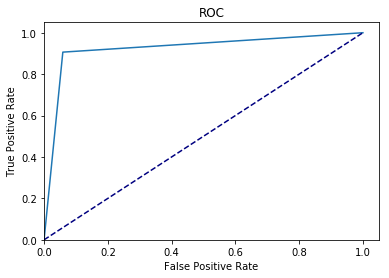

In [72]:
import matplotlib.pyplot as plt
plt.figure()
# plot the FPR as X-axis and TPR as Y-axis
plt.plot(FPR, TPR)
# plot the minimum line 
plt.plot([0,1], [0,1], color='navy', linestyle = '--')
# set X and Y limits
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
# mention lables for X and Y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()